# Vanilla GBM and asserting no correlation strucure

In [1]:
import pandas as pd  
import numpy as np
from scipy.stats import t, rankdata
import matplotlib.pyplot as plt

from dotenv.main import load_dotenv
load_dotenv(override=True)

import os

/Users/simenstang/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def fetch_data_df():
    df = pd.read_csv(
        '../../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    return df

In [3]:
returns_df = fetch_data_df()

returns_df.head()

,REEL,PE,MSCIWORLD,IG,GOV,HY,EONIA
Date,,,,,,,
2005-10-11,0.003231,0.006833,0.004578,-0.001342,-0.001916,-0.004075,0.000054
2005-10-12,-0.003550,-0.009657,-0.007867,-0.002606,-0.001570,-0.004370,0.000058
2005-10-13,-0.018599,-0.010692,0.000588,-0.002331,-0.003062,-0.003423,0.000058
2005-10-14,-0.007856,0.001569,-0.002991,-0.000564,0.000060,0.001618,0.000058
2005-10-17,-0.003613,0.000492,0.003290,0.000458,-0.000227,0.005447,0.000173


In [4]:
returns_df.columns = ['RE', 'PE', 'Equity', 'IG Bonds', 'GOV Bonds', 'HY Bonds', 'Money']
returns_df.head()

,RE,PE,Equity,IG Bonds,GOV Bonds,HY Bonds,Money
Date,,,,,,,
2005-10-11,0.003231,0.006833,0.004578,-0.001342,-0.001916,-0.004075,0.000054
2005-10-12,-0.003550,-0.009657,-0.007867,-0.002606,-0.001570,-0.004370,0.000058
2005-10-13,-0.018599,-0.010692,0.000588,-0.002331,-0.003062,-0.003423,0.000058
2005-10-14,-0.007856,0.001569,-0.002991,-0.000564,0.000060,0.001618,0.000058
2005-10-17,-0.003613,0.000492,0.003290,0.000458,-0.000227,0.005447,0.000173


In [5]:
# reordering columns

returns_df = returns_df[['Equity', 'PE', 'RE', 'GOV Bonds', 'IG Bonds', 'HY Bonds', 'Money']]
returns_df.head()

,Equity,PE,RE,GOV Bonds,IG Bonds,HY Bonds,Money
Date,,,,,,,
2005-10-11,0.004578,0.006833,0.003231,-0.001916,-0.001342,-0.004075,0.000054
2005-10-12,-0.007867,-0.009657,-0.003550,-0.001570,-0.002606,-0.004370,0.000058
2005-10-13,0.000588,-0.010692,-0.018599,-0.003062,-0.002331,-0.003423,0.000058
2005-10-14,-0.002991,0.001569,-0.007856,0.000060,-0.000564,0.001618,0.000058
2005-10-17,0.003290,0.000492,-0.003613,-0.000227,0.000458,0.005447,0.000173


In [6]:
mu = returns_df.mean()
sigma = returns_df.std()

mu, sigma

(Equity       0.000374
 PE           0.000403
 RE           0.000157
 GOV Bonds    0.000101
 IG Bonds     0.000139
 HY Bonds     0.000243
 Money        0.000035
 dtype: float64,
 Equity       0.010117
 PE           0.013433
 RE           0.013354
 GOV Bonds    0.002958
 IG Bonds     0.002496
 HY Bonds     0.003162
 Money        0.000075
 dtype: float64)

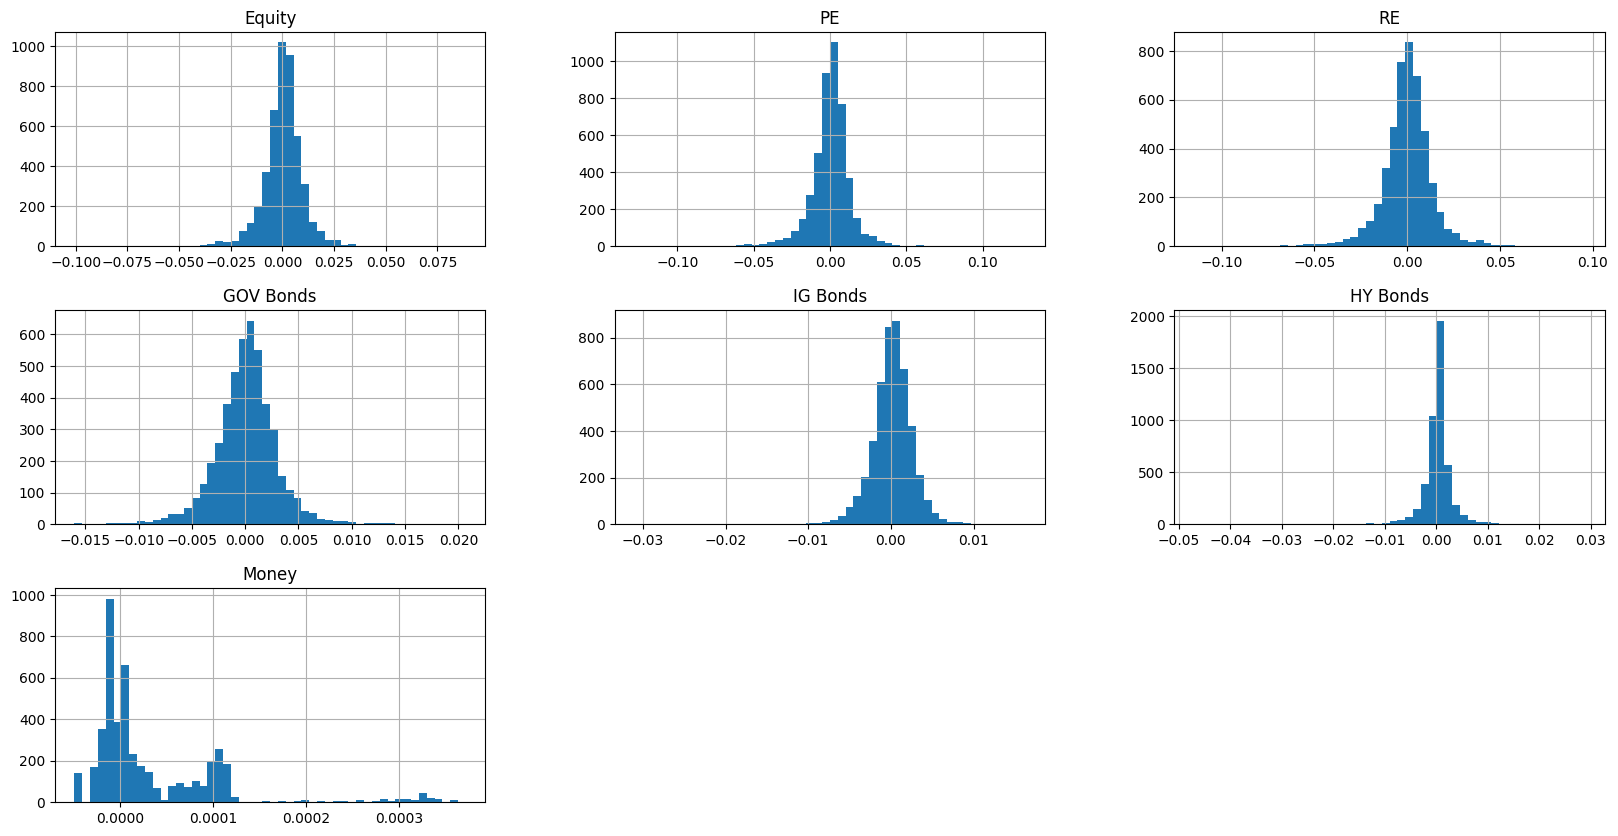

In [7]:
returns_df.hist(bins=50, figsize=(20, 10))
plt.show()

### Get price data as well

In [8]:
def fetch_data_df():
    df = pd.read_csv(
        '../../data/final_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    return df

In [9]:
price_df = fetch_data_df()

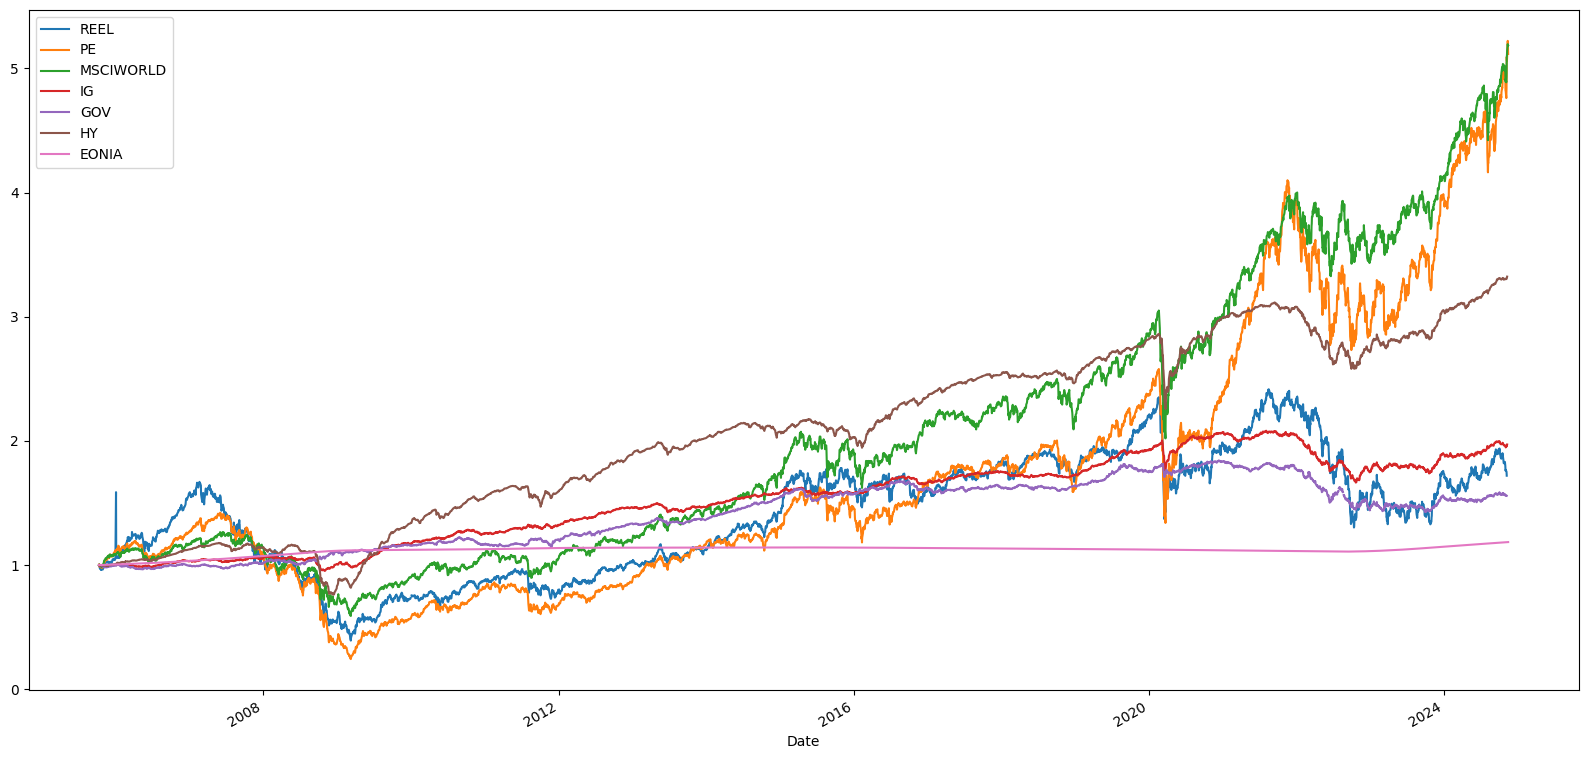

In [10]:
# plot the price data

price_df.plot(figsize=(20, 10))
plt.show()

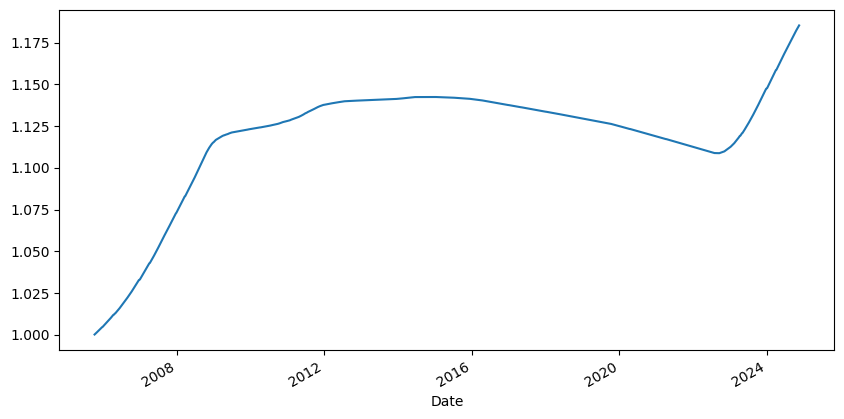

In [11]:
# plot only Money

price_df['EONIA'].plot(figsize=(10, 5))
plt.show()

# 1. Simplest benchmark - GBM for all Assets, No correlation

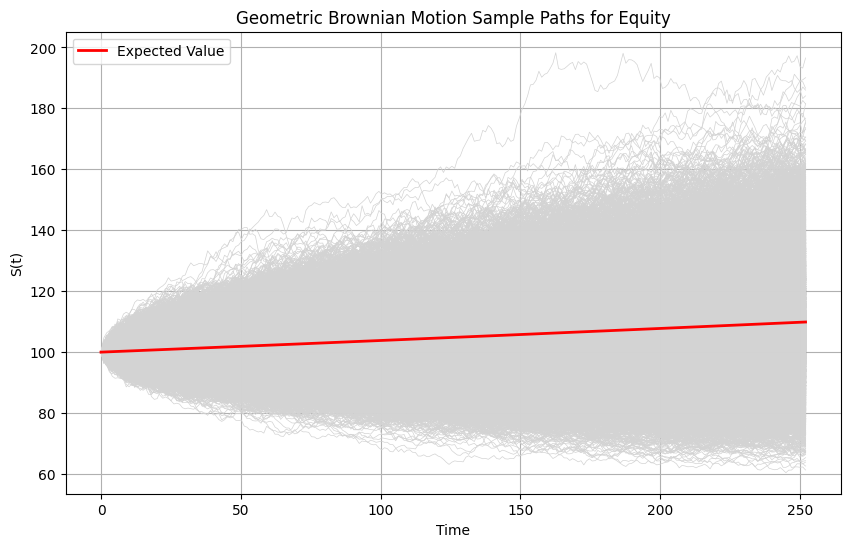

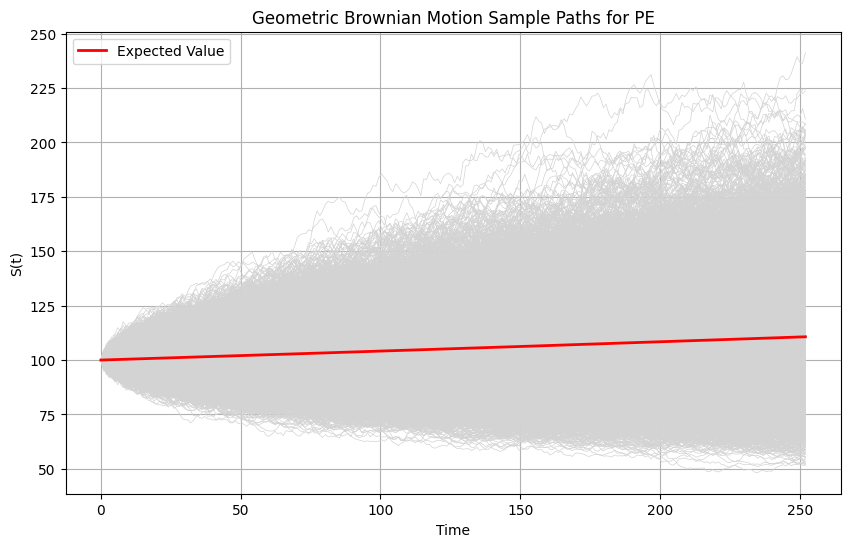

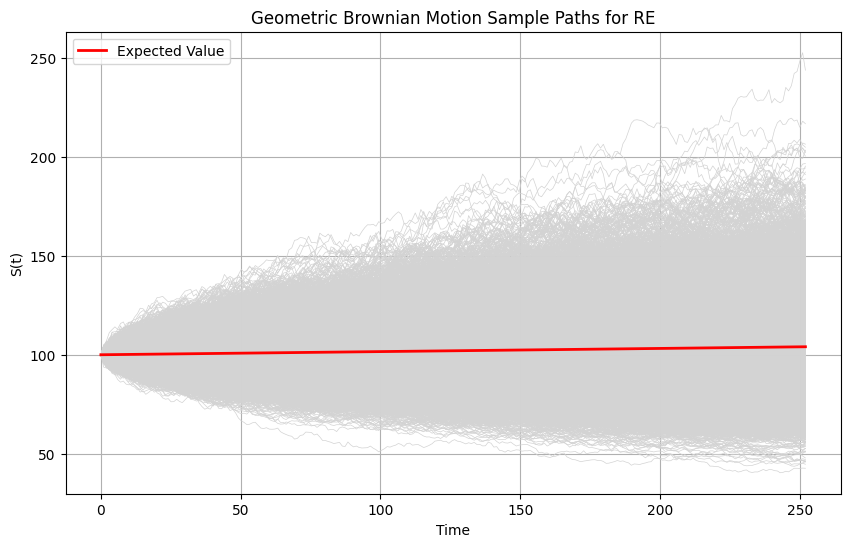

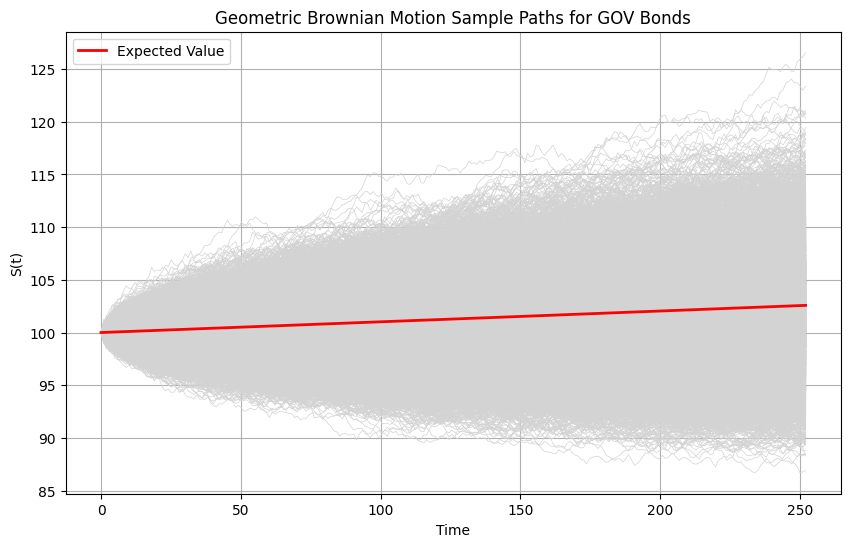

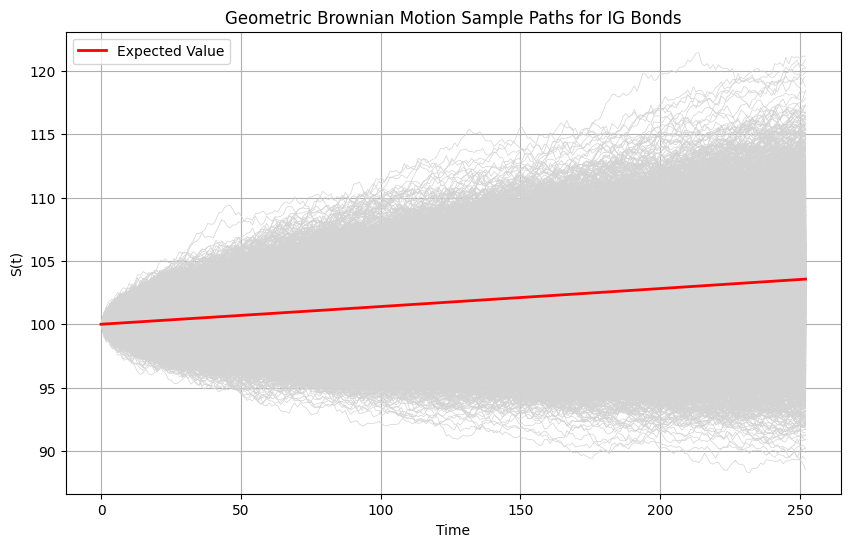

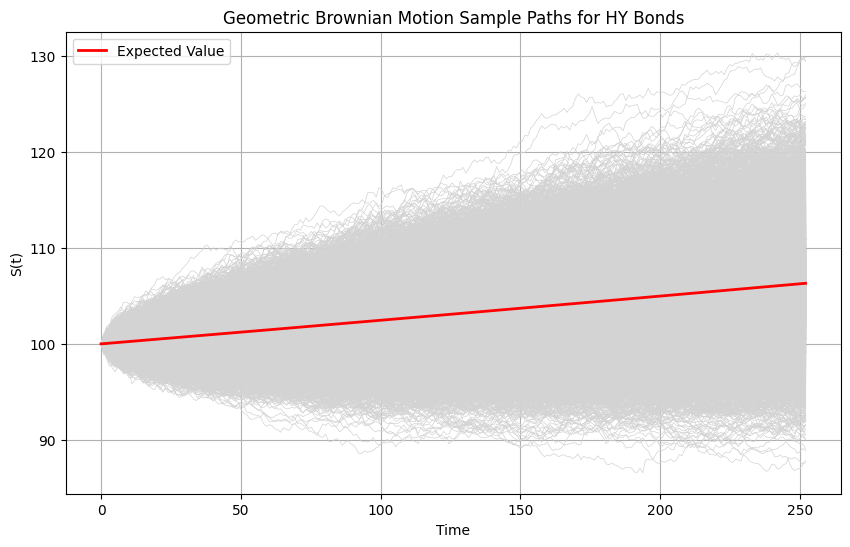

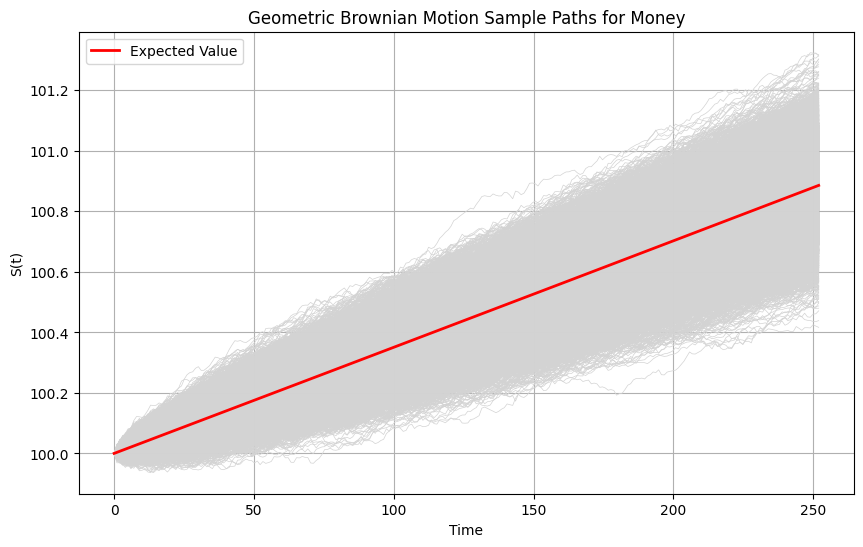

In [12]:
import numpy as np
import matplotlib.pyplot as plt

T = 252
N_sim = 10000 
num_assets = 7
S0 = np.array([100] * num_assets)  
dt = 1
time = np.linspace(0, T, T)  # Time grid

# Daily means and volatilities 
mu = np.array([0.000374, 0.000403, 0.000157, 0.000101, 0.000139, 0.000243, 0.000035])  
sigma = np.array([0.010117, 0.013433, 0.013354, 0.002958, 0.002496, 0.003162, 0.000075])  

# Asset names
asset_names = ["Equity", "PE", "RE", "GOV Bonds", "IG Bonds", "HY Bonds", "Money"]

simulated_final_prices = {}

np.random.seed(42)
for i, asset in enumerate(asset_names):
    Z = np.random.normal(0, 1, (T, N_sim))  # Independent shocks
    r_sim = (mu[i] - 0.5 * sigma[i]**2) * dt + sigma[i] * np.sqrt(dt) * Z  # Log returns

    S = np.zeros((T, N_sim))
    S[0, :] = S0[i]

    for t in range(1, T):
        S[t, :] = S[t-1, :] * np.exp(r_sim[t, :])

    simulated_final_prices[asset] = S[-1, :] # final prices

    expected_value_gbm = S0[i] * np.exp(mu[i] * time)

    plt.figure(figsize=(10, 6))
    for path in S.T:
        plt.plot(time, path, color='lightgray', linewidth=0.5)
    plt.plot(time, expected_value_gbm, color='red',
             linewidth=2, label='Expected Value')
    plt.title(f'Geometric Brownian Motion Sample Paths for {asset}')
    plt.xlabel('Time')
    plt.ylabel('S(t)')
    plt.legend()
    plt.grid(True)

    plt.show()

stored_simulated_data = simulated_final_prices

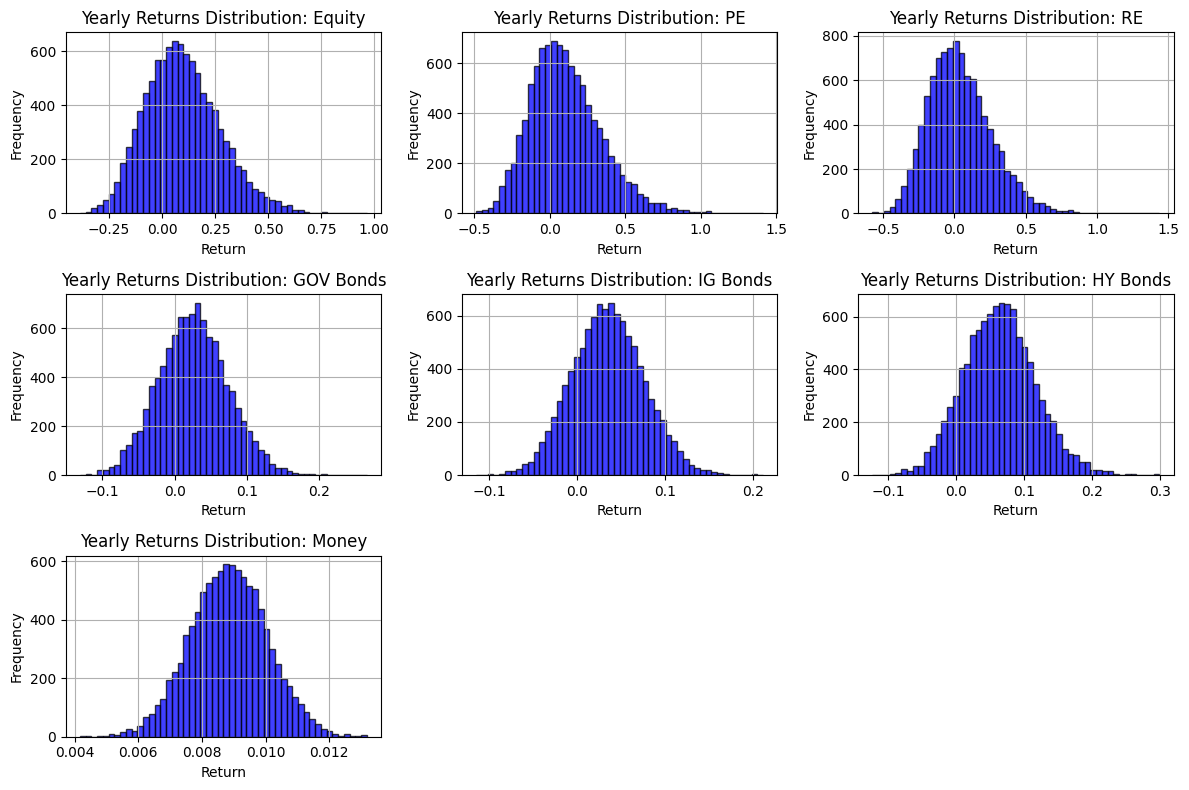

In [13]:
# Plot distributions
yearly_returns = {
    asset: stored_simulated_data[asset] / 100 - 1 for asset in asset_names}

# Plot distributions
plt.figure(figsize=(12, 8))
for i, asset in enumerate(asset_names):
    plt.subplot(3, 3, i + 1)
    plt.hist(yearly_returns[asset], bins=50,
             alpha=0.75, color="blue", edgecolor="black")
    plt.title(f"Yearly Returns Distribution: {asset}")
    plt.xlabel("Return")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

Note: We are plotting return of final prices. Because of that, it looks lognormal. If we had plotted R = ln(S_T / S_0) we get normal. 

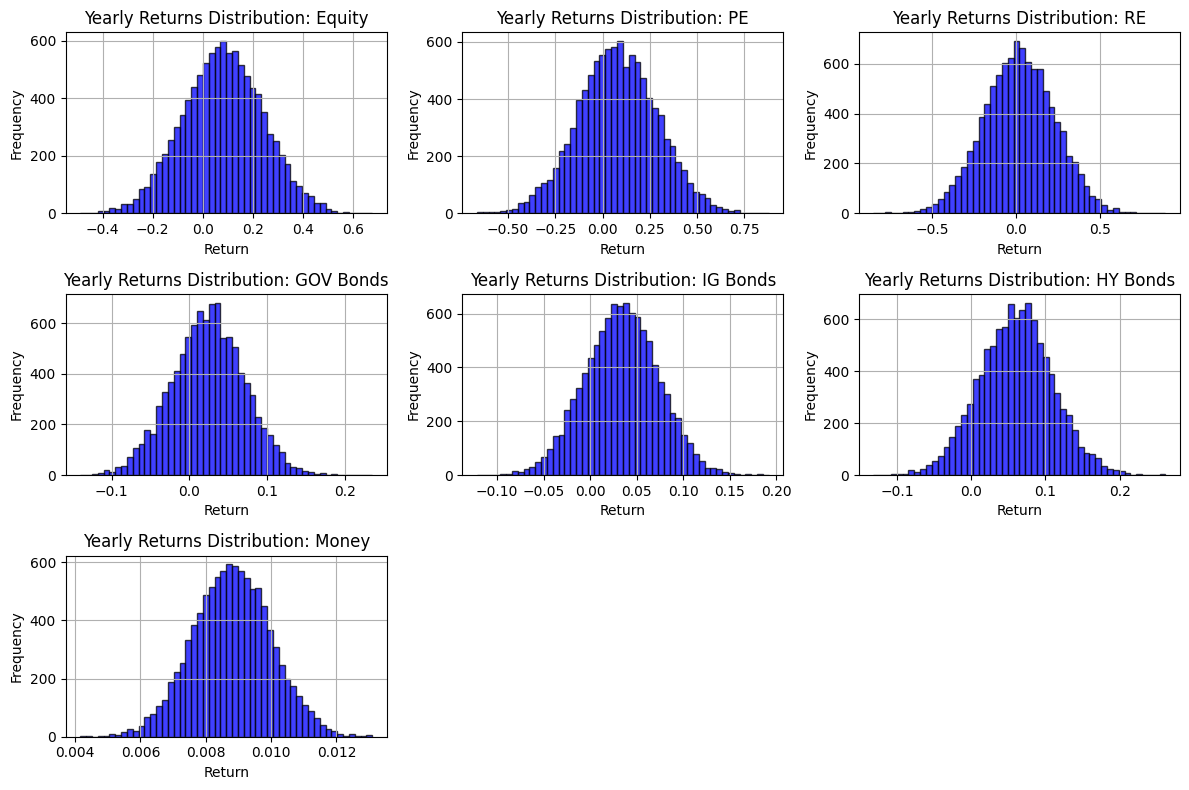

In [14]:
yearly_returns_log = {
    asset: np.log(stored_simulated_data[asset] / 100) for asset in asset_names
}

# Plot distributions
plt.figure(figsize=(12, 8))
for i, asset in enumerate(asset_names):
    plt.subplot(3, 3, i + 1)
    plt.hist(yearly_returns_log[asset], bins=50,
             alpha=0.75, color="blue", edgecolor="black")
    plt.title(f"Yearly Returns Distribution: {asset}")
    plt.xlabel("Return")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

Portfolio VaR (95% confidence) in return terms: -0.0684


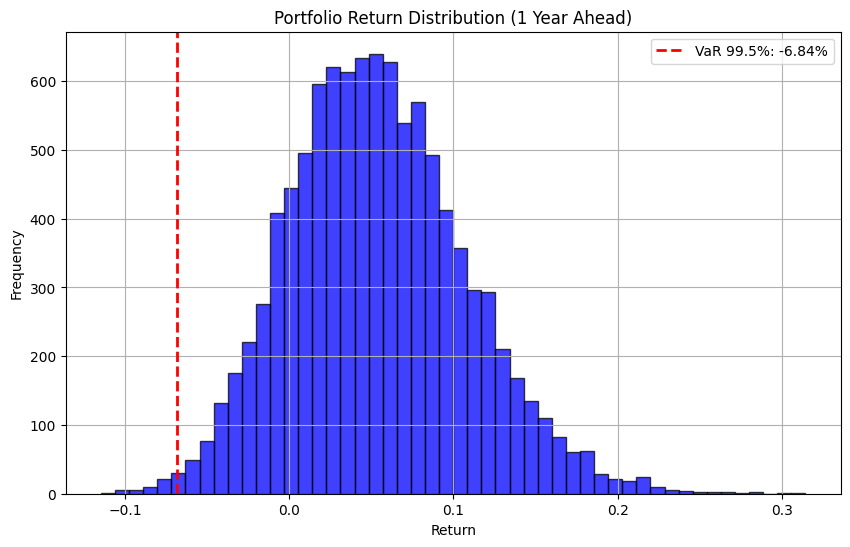

In [15]:
weights = np.array([1/7] * 7)  

returns_matrix = np.array(list(yearly_returns.values()))  

portfolio_returns = np.dot(weights, returns_matrix)  

var_995 = np.percentile(portfolio_returns, 0.5)  

initial_investment = 100

print(f"Portfolio VaR (95% confidence) in return terms: {var_995:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, color="blue",
         alpha=0.75, edgecolor="black")
plt.axvline(var_995, color="red", linestyle="dashed",
            linewidth=2, label=f"VaR 99.5%: {var_995:.2%}")
plt.title("Portfolio Return Distribution (1 Year Ahead)")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.show()

# Intermediate approach - Correlated multi-asset GBM + Mean reverting bonds

# Advanced, state of the art appraoch (Multi-Factor Model + Regime Switching + Stochastic Rates)